In [1]:
setwd('C:/Users/dell/PycharmProjects/MachineLearning/Pandas/datasets')

In [2]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [4]:
data(diamonds)

<img src = './ggplot2_onevariable.png'/>

# Smoothed density estimates

Computes and draws kernel density estimate, which is a smoothed version of the histogram. This is a useful alternative to the histogram for continuous data that comes from an underlying smooth distribution.

```R
geom_density(
  mapping = NULL,
  data = NULL,
  stat = "density",
  position = "identity",
  ...,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE,
  outline.type = "upper"
)

stat_density(
  mapping = NULL,
  data = NULL,
  geom = "area",
  position = "stack",
  ...,
  bw = "nrd0",
  adjust = 1,
  kernel = "gaussian",
  n = 512,
  trim = FALSE,
  na.rm = FALSE,
  orientation = NA,
  show.legend = NA,
  inherit.aes = TRUE
)
```

**Arguments**  
`outline.type`	
Type of the outline of the area; "both" draws both the upper and lower lines, "upper"/"lower" draws the respective lines only. "full" draws a closed polygon around the area.

`geom`, `stat`	
Use to override the default connection between geom_density and stat_density.

`bw`
The smoothing bandwidth to be used. If numeric, the standard deviation of the smoothing kernel. If character, a rule to choose the bandwidth, as listed in stats::bw.nrd().

`adjust`	
A multiplicate bandwidth adjustment. This makes it possible to adjust the bandwidth while still using the a bandwidth estimator. For example, adjust = 1/2 means use half of the default bandwidth.

`kernel`	
Kernel. See list of available kernels in density().

`n`	
number of equally spaced points at which the density is to be estimated, should be a power of two, see density() for details

`trim`	
If FALSE, the default, each density is computed on the full range of the data. If TRUE, each density is computed over the range of that group: this typically means the estimated x values will not line-up, and hence you won't be able to stack density values. This parameter only matters if you are displaying multiple densities in one plot or if you are manually adjusting the scale limits.

# Aesthetic

**`geom_density()`** understands the following aesthetics (required aesthetics are in bold):

* **x**

* **y**

* alpha

* colour

* fill

* group

* linetype

* size

* weight

# Example

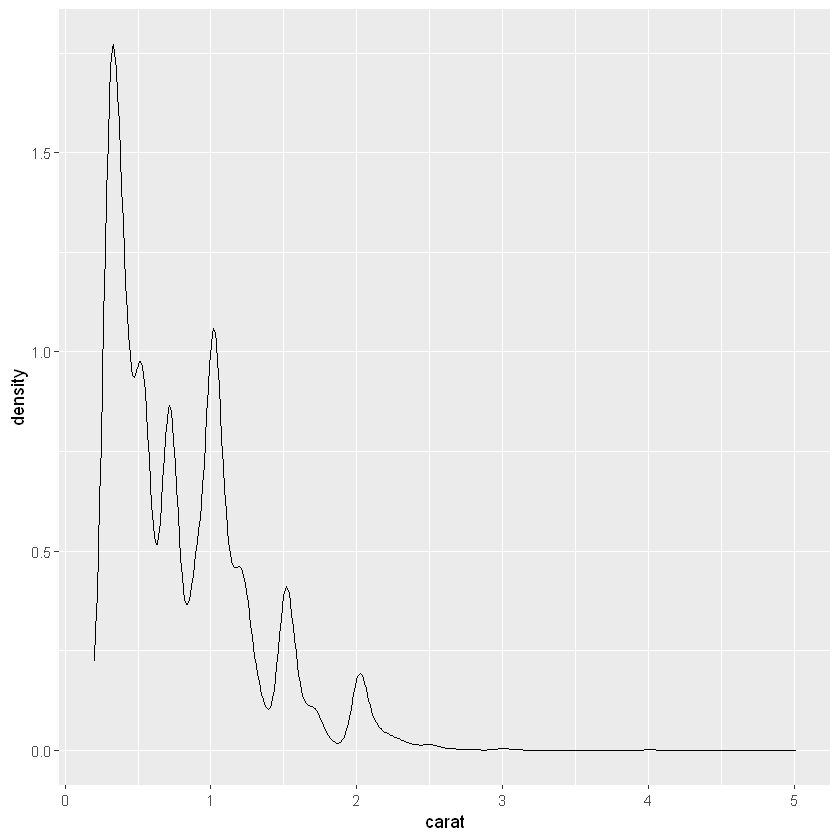

In [5]:
ggplot(diamonds, aes(carat)) +
geom_density()

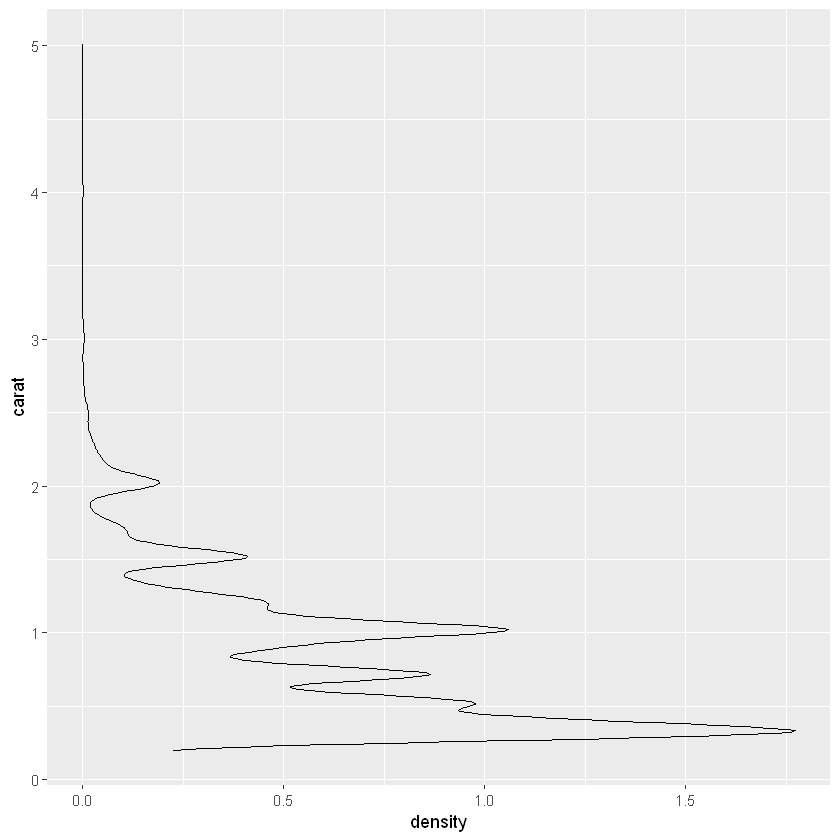

In [8]:
#fip horizontal
ggplot(diamonds, aes(y = carat)) +
geom_density()

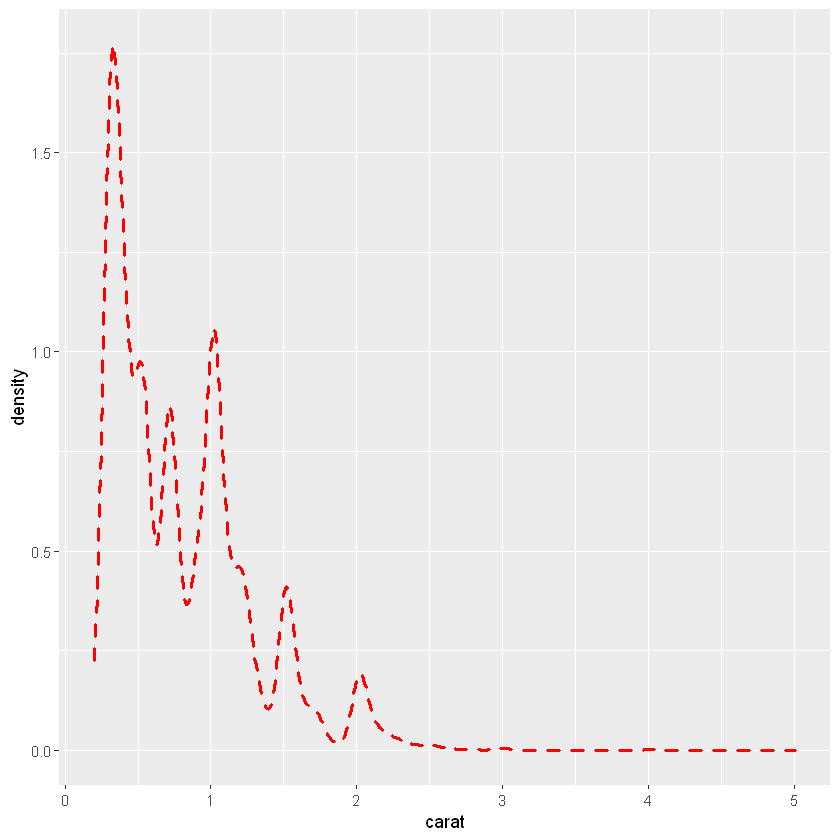

In [11]:
#customiztaion
#linewidth = 1
#color = 'red'
#linestyle = '--'

ggplot(diamonds, aes(carat)) +
geom_density(linetype = 'dashed', color = 'red', size = 1)

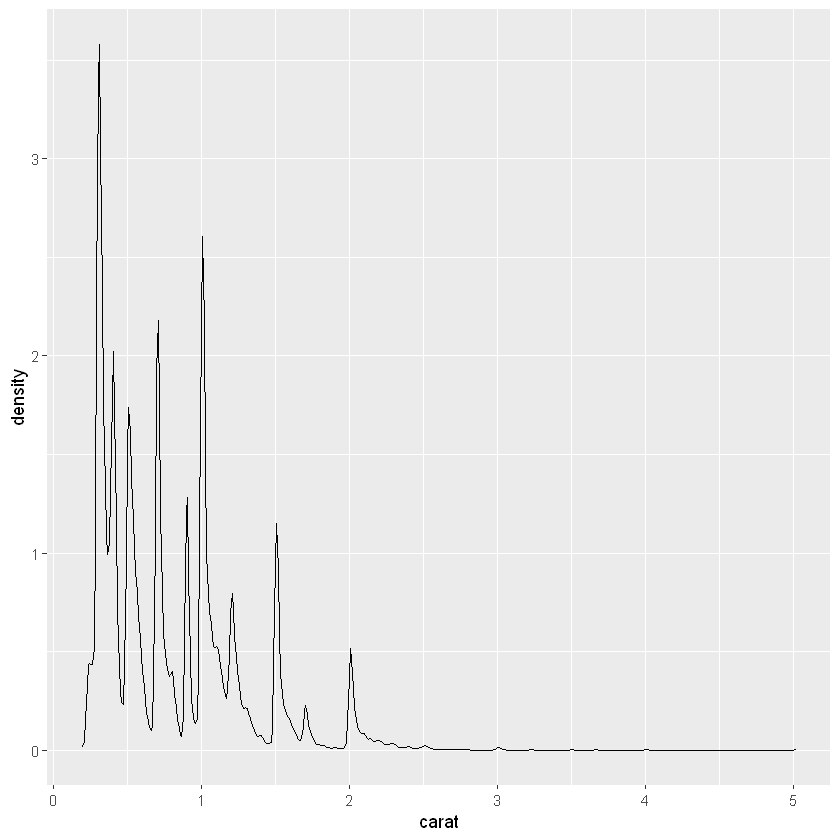

In [12]:
ggplot(diamonds, aes(carat)) +
  geom_density(adjust = 1/5) #scale the bandwidth by 1/5

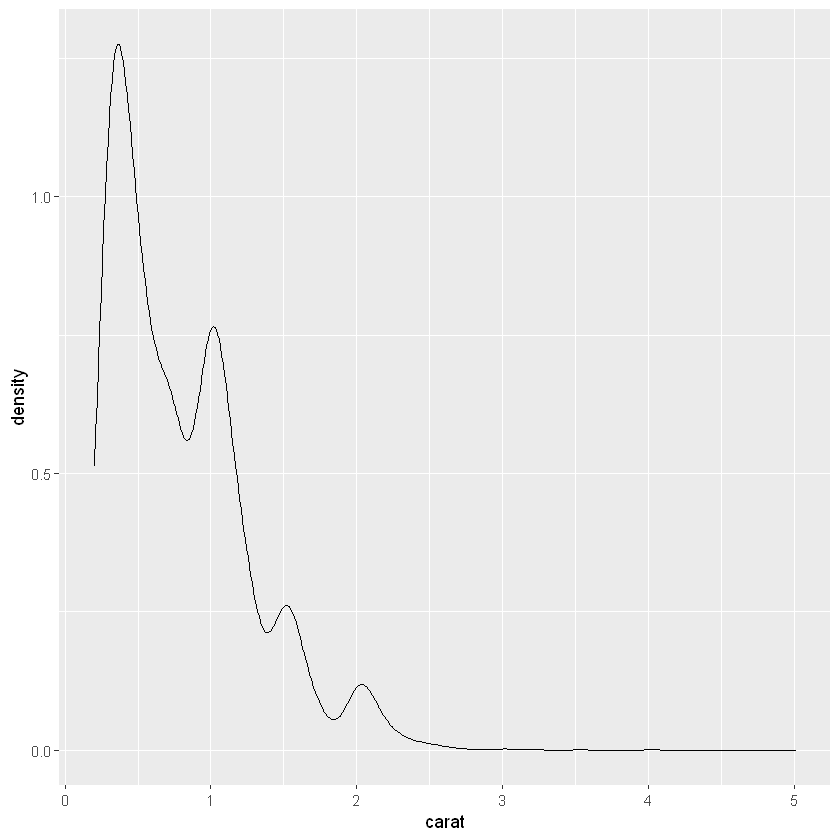

In [13]:
#scale the bandwidth by 2
ggplot(diamonds, aes(carat)) +
geom_density(adjust = 2)

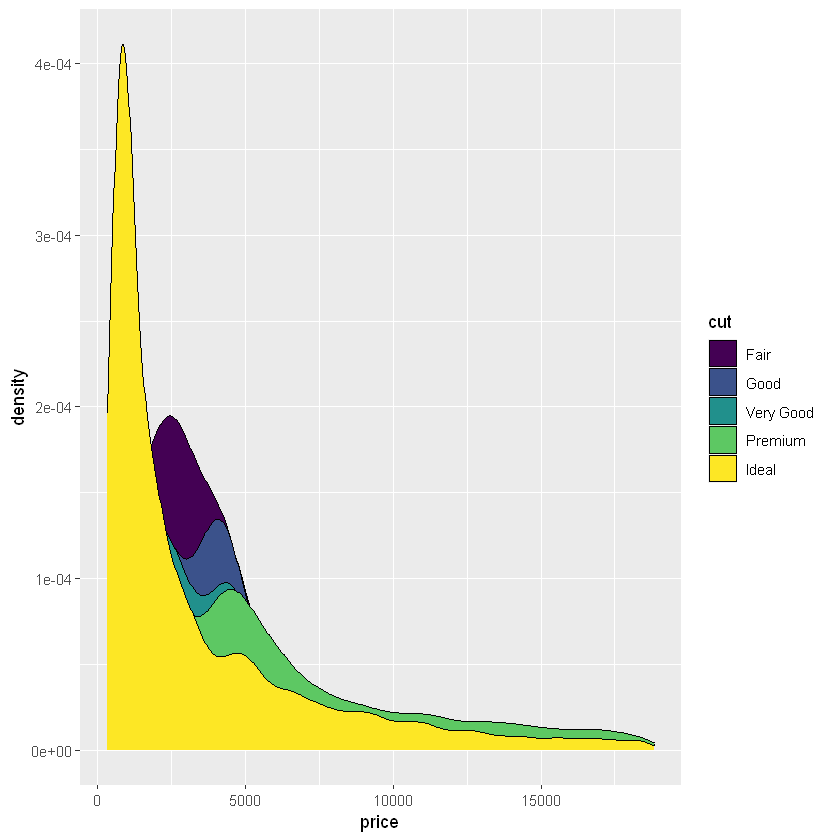

In [15]:
#fill = cut, set facecolor for each type of cut
ggplot(diamonds, aes(price, fill = cut)) +  
geom_density()

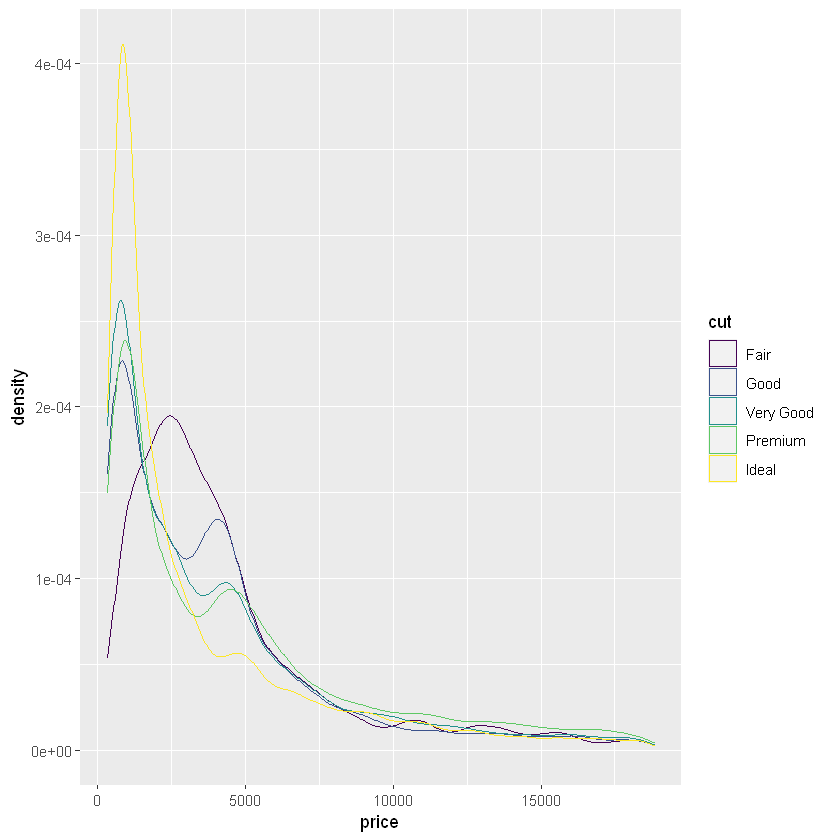

In [16]:
ggplot(diamonds, aes(price, color = cut)) + 
geom_density()

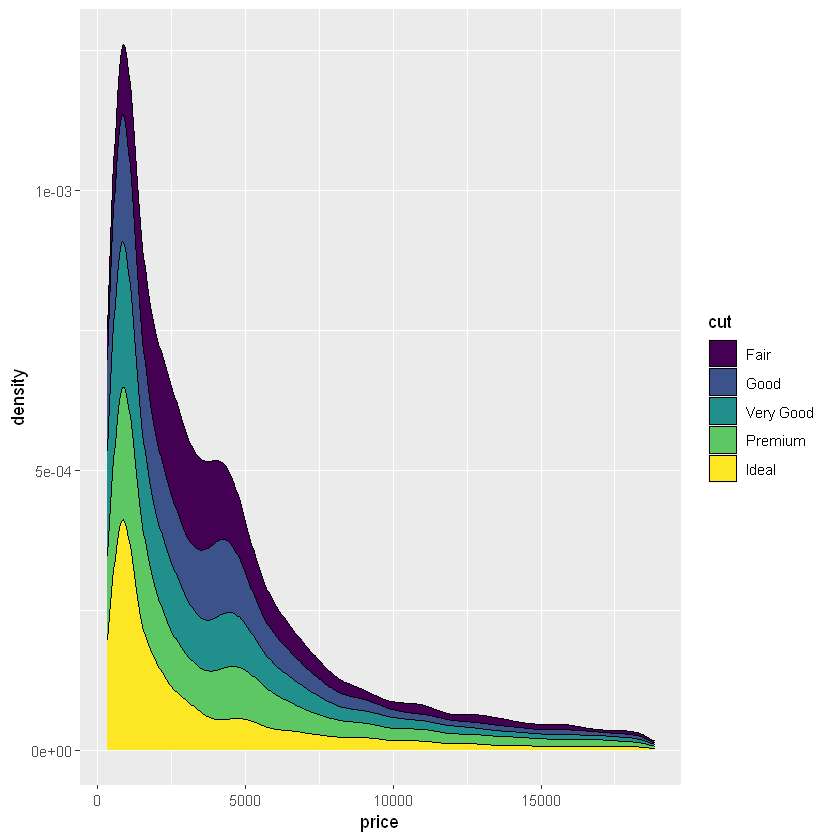

In [17]:
# Stacked density plots: if you want to create a stacked density plot, you
# probably want to 'count' (density * n) variable instead of the default
# density
ggplot(diamonds, aes(price, fill = cut)) + 
geom_density(position = 'stack')

In [ ]:
# Preserves marginal densities: using after_stat(count) instead of after_stat(density)
ggplot(diamonds, aes(carat, after_stat(count), fill = cut)) +
  geom_density(position = "stack")

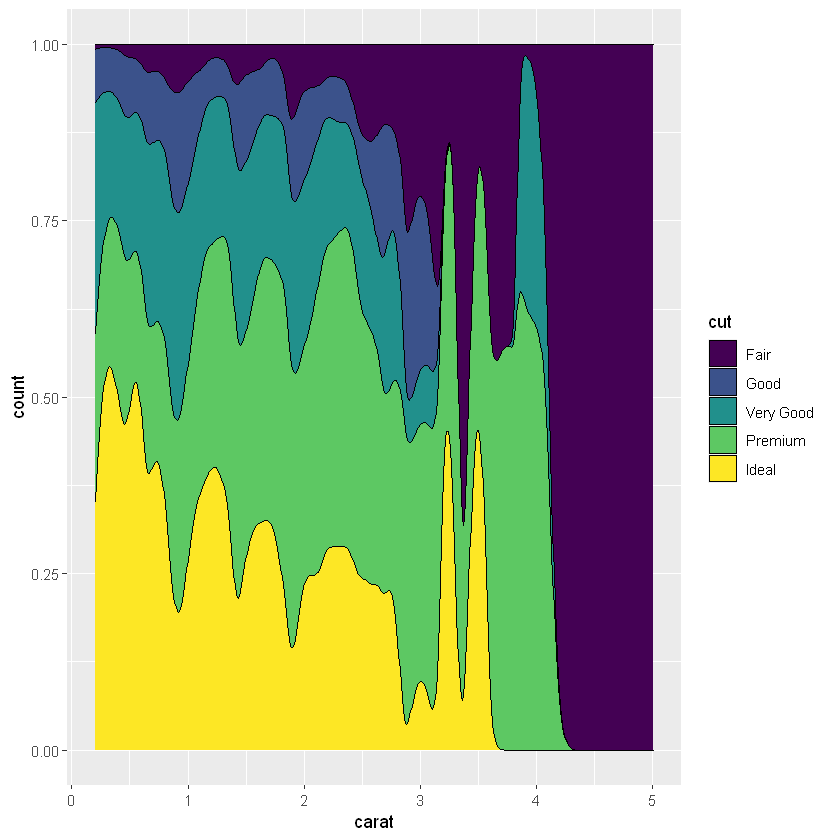

In [19]:
# You can use position="fill" to produce a conditional density estimate
ggplot(diamonds, aes(carat, after_stat(count), fill = cut)) +
  geom_density(position = "fill")


<hr>

Make a frequency estimation, instead of density estimation: using return value: **`..count..`**

In [2]:
library(dslabs)

Warning message:
"package 'dslabs' was built under R version 3.6.3"

In [3]:
head(heights)

sex,height
Male,75
Male,70
Male,68
Male,74
Male,61
Female,65


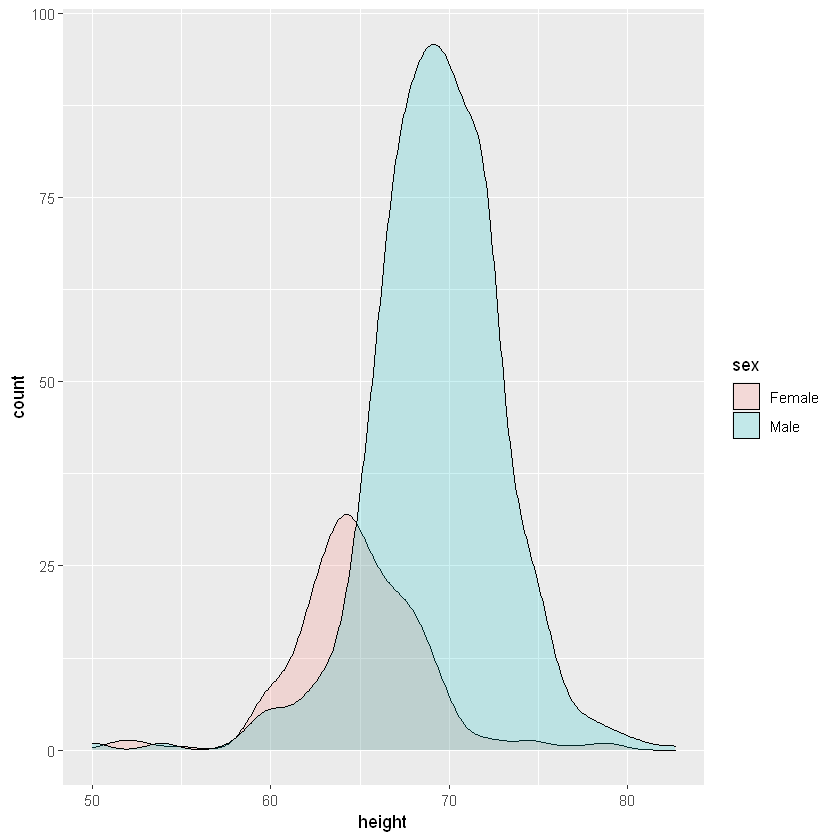

In [4]:
ggplot(heights, aes(x = height, y = ..count.., fill = sex)) +
geom_density(alpha = .2)